![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Deep Learning Methods </center>
## <center> Lecture 07 - PyTorch</center>
### <center> Schdeulers</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/07_PyTorch2/MainPyTorchSchdulers.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [4]:
if 'google.colab' in str(get_ipython()):
    !npx degit FixelAlgorithmsTeam/FixelCourses/DeepLearningMethods/07_PyTorch2/DeepLearningFramework ./DeepLearningFramework
    !pip install torchinfo

In [3]:
#-- Imports:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
import torch

import torch.nn          as nn
import torch.optim       as optim
import torchinfo

#-- Fix seed (for presentation sake)
torch.manual_seed(1)
np.random.seed   (1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark     = False

### Download CIFAR-10 dataset:

In [5]:
import torchvision
import torchvision.transforms as transforms

DATA_PATH = '../../data'
oTrainSet = torchvision.datasets.CIFAR10(root=DATA_PATH, train=True,  download=True, transform=transforms.ToTensor())
oTestSet  = torchvision.datasets.CIFAR10(root=DATA_PATH, train=False, download=True, transform=transforms.ToTensor())
lClasses  = oTrainSet.classes

oTrainSet.data.shape, oTrainSet[0][0].shape

Files already downloaded and verified
Files already downloaded and verified


((50000, 32, 32, 3), torch.Size([3, 32, 32]))

#### Compute mean and variance:

In [6]:
vMean = oTrainSet.data.mean((0,1,2)) / 255
vStd  = oTrainSet.data.std ((0,1,2)) / 255
print('µ =', vMean)
print('σ =', vStd)

µ = [0.49139968 0.48215841 0.44653091]
σ = [0.24703223 0.24348513 0.26158784]


#### Set datasets with normalization:

In [7]:
oTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(vMean, vStd)
])

oTrainSet.transform = oTransform
oTestSet .transform = oTransform

#### Create data loaders:

In [8]:
batchSize = 128
oTrainDL  = torch.utils.data.DataLoader(oTrainSet, shuffle=True,  batch_size=1*batchSize, num_workers=4, persistent_workers=True)
oTestDL   = torch.utils.data.DataLoader(oTestSet,  shuffle=False, batch_size=2*batchSize, num_workers=4, persistent_workers=True)

mX, vY    = next(iter(oTrainDL))
mX.shape

torch.Size([128, 3, 32, 32])

#### Define the model (2D CNN):

In [9]:
def WeightInit(oModule):
        if isinstance(oModule, nn.Conv2d):
            nn.init.kaiming_normal_(oModule.weight.data)

#-- Model:
def GetModel():
    oModel = nn.Sequential(
        nn.Identity(), #-- does nothing
        
        nn.Conv2d(3,   32,  3, bias=False), nn.BatchNorm2d(32),                  nn.ReLU(),
        nn.Conv2d(32,  64,  3, bias=False), nn.BatchNorm2d(64), nn.MaxPool2d(2), nn.ReLU(),
        nn.Conv2d(64,  128, 3, bias=False), nn.BatchNorm2d(128),                 nn.ReLU(),
        nn.Conv2d(128, 256, 3, bias=False), nn.BatchNorm2d(256),                 nn.ReLU(),
        nn.Conv2d(256, 256, 3, bias=False), nn.BatchNorm2d(256),                 nn.ReLU(),
                
        nn.AdaptiveAvgPool2d(1),
        nn.Flatten(),
        nn.Linear(256, 10)
    )
    
    oModel.apply(WeightInit)
    return oModel

#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
torchinfo.summary(GetModel(), mX.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Identity: 1-1                          [128, 3, 32, 32]          --
├─Conv2d: 1-2                            [128, 32, 30, 30]         864
├─BatchNorm2d: 1-3                       [128, 32, 30, 30]         64
├─ReLU: 1-4                              [128, 32, 30, 30]         --
├─Conv2d: 1-5                            [128, 64, 28, 28]         18,432
├─BatchNorm2d: 1-6                       [128, 64, 28, 28]         128
├─MaxPool2d: 1-7                         [128, 64, 14, 14]         --
├─ReLU: 1-8                              [128, 64, 14, 14]         --
├─Conv2d: 1-9                            [128, 128, 12, 12]        73,728
├─BatchNorm2d: 1-10                      [128, 128, 12, 12]        256
├─ReLU: 1-11                             [128, 128, 12, 12]        --
├─Conv2d: 1-12                           [128, 256, 10, 10]        294,912

In [10]:
# def WeightInit(oModule):
#         if isinstance(oModule, nn.Conv2d):
#             nn.init.kaiming_normal_(oModule.weight.data)

# #-- Model:
# def GetModel():
#     oModel = nn.Sequential(
#         nn.Identity(), #-- does nothing
        
#         nn.Conv2d(3,   30,  3, bias=False), nn.BatchNorm2d(30),                   nn.ReLU(),
#         nn.Conv2d(30,  100, 3, bias=False), nn.BatchNorm2d(100), nn.MaxPool2d(2), nn.ReLU(),
#         nn.Conv2d(100, 200, 3, bias=False), nn.BatchNorm2d(200),                  nn.ReLU(),
#         nn.Conv2d(200, 200, 3, bias=False), nn.BatchNorm2d(200),                  nn.ReLU(),
#         nn.Conv2d(200, 200, 3, bias=False), nn.BatchNorm2d(200),                  nn.ReLU(),
                
#         nn.AdaptiveAvgPool2d(1),
#         nn.Flatten(),
#         nn.Linear(200, 10)
#     )
    
#     oModel.apply(WeightInit)
#     return oModel

# #--------------------------------------------------------------------------------#
# #--------------------------------------------------------------------------------#
# torchsummary.summary(GetModel(), (3, 32, 32), device='cpu');

### Add scheduler to the training loop:

In [11]:
def Epoch(oModel, oDataDL, Loss, Metric, oOptim=None, oScheduler=None, bTrain=True):

    epochLoss   = 0
    epochMetric = 0
    count       = 0
    nIter       = len(oDataDL)
    #===================================#
    vLR         = np.full(nIter, np.nan)
    #===================================#
    DEVICE      = next(oModel.parameters()).device #-- CPU\GPU
    
    oModel.train(bTrain) #-- train or test

    #-- Iterate over the mini-batches:
    for ii, (mX, vY) in enumerate(oDataDL):
        #-- Move to device (CPU\GPU):
        mX = mX.to(DEVICE)
        vY = vY.to(DEVICE)

        #-- Forward:
        if bTrain == True:
            #-- Store computational graph:
            mZ   = oModel(mX)
            loss = Loss  (mZ, vY)
       
            #-- Backward:
            oOptim.zero_grad() #-- set gradients to zeros
            loss  .backward () #-- backward
            oOptim.step     () #-- update parameters
            #============================================#
            vLR[ii] = oScheduler.get_last_lr()[0]
            oScheduler.step() #-- update learning rate
            #============================================#
            
        else:
            with torch.no_grad():
                #-- Do not store computational graph:
                mZ   = oModel(mX)
                loss = Loss(mZ, vY)

        with torch.no_grad():
            Nb           = vY.shape[0]
            count       += Nb
            epochLoss   += Nb * loss.item()
            epochMetric += Nb * Metric(mZ, vY)
        print(f'\r{"Train" if bTrain else "Val"} - Iteration: {ii:3d} ({nIter}): loss = {loss:2.6f}', end='')

    print('', end='\r')
    epochLoss   /= count
    epochMetric /= count

    return epochLoss, epochMetric, vLR

In [12]:
import time
from DeepLearningFramework.Metric import Accuracy

def TrainClassficationModel(oModel, oTrainData, oValData, Loss, nEpochs, oOptim, oScheduler=None):

    vTrainLoss = np.full(nEpochs, np.nan)
    vTrainAcc  = np.full(nEpochs, np.nan)
    vValLoss   = np.full(nEpochs, np.nan)
    vValAcc    = np.full(nEpochs, np.nan)
    vLR        = np.full(0,       np.nan)
    bestAcc    = 0

    for epoch in range(nEpochs):
        startTime                 = time.time()
        #================================================================================================================#
        trainLoss, trainAcc, vLRi = Epoch(oModel, oTrainData, Loss, Accuracy, oOptim, oScheduler, bTrain=True ) #-- train
        #================================================================================================================#
        valLoss,   valAcc,   _    = Epoch(oModel, oValData,   Loss, Accuracy,                     bTrain=False) #-- validate
        epochTime                 = time.time() - startTime

        #-- Display:
        print('Epoch '              f'{epoch    :03d}:',   end='')
        print(' | Train loss: '     f'{trainLoss:6.3f}',   end='')
        print(' | Val loss: '       f'{valLoss  :6.3f}',   end='')
        print(' | Train Accuracy: ' f'{trainAcc :6.3f}',   end='')
        print(' | Val Accuracy: '   f'{valAcc   :6.3f}',   end='')
        print(' | epoch time: '     f'{epochTime:6.3f} |', end='')

        vTrainLoss[epoch] = trainLoss
        vTrainAcc [epoch] = trainAcc
        vValLoss  [epoch] = valLoss
        vValAcc   [epoch] = valAcc
        #==============================================#
        vLR               = np.concatenate([vLR, vLRi])
        #==============================================#

        #-- Save best model (early stopping):
        if bestAcc < valAcc:
            bestAcc = valAcc
            try:
                torch.save(oModel.state_dict(), 'BestModel.pt')
            except:
                pass
            print(' <-- Checkpoint!')
        else:
            print('')

    #-- Load best model (early stopping):
    oModel.load_state_dict(torch.load('BestModel.pt'))

    return vTrainLoss, vTrainAcc, vValLoss, vValAcc, vLR

#### Device, loss, and epochs:

In [13]:
DEVICE  = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
Loss    = nn.CrossEntropyLoss()
nEpochs = 10
nIter   = nEpochs * len(oTrainDL)
nIter

3910

### Define schedulers:

![](https://github.com/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/07_PyTorch2/Schedulers.PNG?raw=true)


In [14]:
from torch.optim import lr_scheduler

lScheduler   = []
lScheduler  += [('Constant', lr_scheduler.LinearLR,          {'start_factor':1     })]
lScheduler  += [('Exp',      lr_scheduler.ExponentialLR,     {'gamma'       :0.9993})]
lScheduler  += [('Cos',      lr_scheduler.CosineAnnealingLR, {'T_max'       :nIter} )]
lScheduler  += [('Cyclic',   lr_scheduler.CyclicLR,          {'base_lr'     :1e-4, 'max_lr':1e-2, 'step_size_up':nIter//6, 'step_size_down':nIter//6, 'mode':'triangular2', 'cycle_momentum':False})]
lScheduler  += [('OneCycle', lr_scheduler.OneCycleLR,        {'max_lr'      :1e-2, 'total_steps':nIter})]

#### Train with different schedulers:

In [15]:
dHistory = {}

for (name, Scheduler, dArgs) in lScheduler:
    print('=================================================================================================')
    print(name)
    print('=================================================================================================')
    
    oModel         = GetModel().to(DEVICE)
    oOptim         = optim.AdamW(oModel.parameters(), lr=1e-2, betas=(0.9, 0.99), weight_decay=1e-4)
    oScheduler     = Scheduler(oOptim, **dArgs)
    dHistory[name] = TrainClassficationModel(oModel, oTrainDL, oTestDL, Loss, nEpochs, oOptim, oScheduler=oScheduler);

Constant
Epoch 000: | Train loss:  1.293 | Val loss:  1.206 | Train Accuracy:  0.529 | Val Accuracy:  0.580 | epoch time: 10.154 | <-- Checkpoint!
Epoch 001: | Train loss:  0.831 | Val loss:  0.882 | Train Accuracy:  0.706 | Val Accuracy:  0.703 | epoch time:  3.972 | <-- Checkpoint!
Epoch 002: | Train loss:  0.657 | Val loss:  0.693 | Train Accuracy:  0.771 | Val Accuracy:  0.760 | epoch time:  3.962 | <-- Checkpoint!
Epoch 003: | Train loss:  0.539 | Val loss:  0.681 | Train Accuracy:  0.814 | Val Accuracy:  0.769 | epoch time:  3.960 | <-- Checkpoint!
Epoch 004: | Train loss:  0.453 | Val loss:  0.616 | Train Accuracy:  0.844 | Val Accuracy:  0.799 | epoch time:  3.970 | <-- Checkpoint!
Epoch 005: | Train loss:  0.380 | Val loss:  0.533 | Train Accuracy:  0.868 | Val Accuracy:  0.816 | epoch time:  3.976 | <-- Checkpoint!
Epoch 006: | Train loss:  0.312 | Val loss:  0.644 | Train Accuracy:  0.891 | Val Accuracy:  0.800 | epoch time:  3.979 |
Epoch 007: | Train loss:  0.257 | Val los

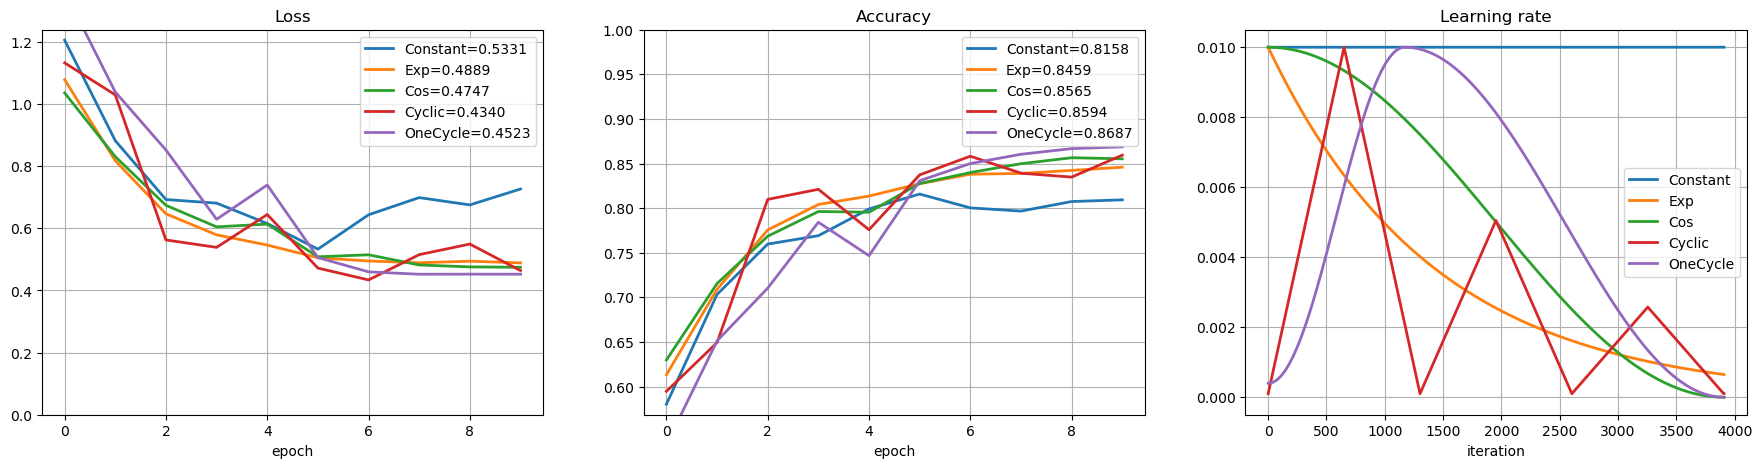

In [16]:
def PlotHistory(dHistory):

    _, vAx = plt.subplots(1, 3, figsize=(22, 5))

    for key in dHistory:
        
        _, _, vValLoss, vValAcc, vLR = dHistory[key]
        vAx[0].plot      (vValLoss, lw=2, label=f'{key}={vValLoss.min():.4f}')
        vAx[0].set_title ('Loss')
        vAx[0].set_xlabel('epoch')
        vAx[0].set_ylim  (bottom=0)
        vAx[0].legend    ()
        vAx[0].grid      (True)

        vAx[1].plot      (vValAcc, lw=2, label=f'{key}={vValAcc.max():.4f}')
        vAx[1].set_title ('Accuracy')
        vAx[1].set_xlabel('epoch')
        vAx[1].set_ylim  (top=1)
        vAx[1].legend    ()
        vAx[1].grid      (True)
        
        vAx[2].plot      (vLR, lw=2, label=key)
        vAx[2].set_title ('Learning rate')
        vAx[2].set_xlabel('iteration')
        vAx[2].legend    ()
        vAx[2].grid      (True)
    
PlotHistory(dHistory)
plt.show   ()